<a href="https://colab.research.google.com/github/stevengregori92/LearnWord2Vec/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install luwiji
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_indo = stopwords.words('indonesian') + list(punctuation)

#Import Data

In [ ]:
!gdown https://drive.google.com/uc?id=10OnDq1OAByUxcQEPCDZ19jxU0W8QV6hu
!unzip /content/word2vec.zip

Downloading...
From: https://drive.google.com/uc?id=10OnDq1OAByUxcQEPCDZ19jxU0W8QV6hu
To: /content/word2vec.zip
100% 184k/184k [00:00<00:00, 125MB/s]
Archive:  /content/word2vec.zip
   creating: data/
  inflating: data/kompas.txt         
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._kompas.txt  
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/gojek_review_sentiment.csv  
  inflating: __MACOSX/data/._gojek_review_sentiment.csv  
  inflating: data/gojek_review.csv   


In [ ]:
df = pd.read_csv('data/gojek_review_sentiment.csv')
df

,review,rate
0,Apa aplikasi yang bagus untuk dengan mudah per...,positive
1,Aplikasi ini banyak membantu saya. Sekarang sa...,positive
2,Mengerikan. Antarmukanya sangat membingungkan....,negative
3,Aplikasi yang cukup mengesankan. Butuh waktu l...,positive
4,Aplikasi ini sebenarnya bagus dan sangat memba...,positive
...,...,...
1777,Jelas lebih baik daripada yang lain di luar sa...,positive
1778,"Untuk ruang penyimpanan yang luas, buatlah sed...",negative
1779,"Aplikasi yang sangat bagus, beri kami lebih ba...",positive
1780,cintai ini terutama ketika Anda membutuhkan tr...,positive


In [ ]:
df.rate.value_counts(normalize=True)

negative    0.595398
positive    0.404602
Name: rate, dtype: float64

#Dataset Splitting

In [ ]:
X = df.review
y = df.rate

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1425,), (357,), (1425,), (357,))

#Training

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
pipeline = Pipeline([
    ('prep', CountVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)),
    ('algo', SVC(max_iter=500))
])

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=4, n_iter=50, verbose=1, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 4.418441521199726, 'algo__gamma': 0.010547383621352041}
0.9487719298245614 0.8891137915840494 0.896358543417367


#Evaluation

In [ ]:
from jcopml.plot import plot_confusion_matrix

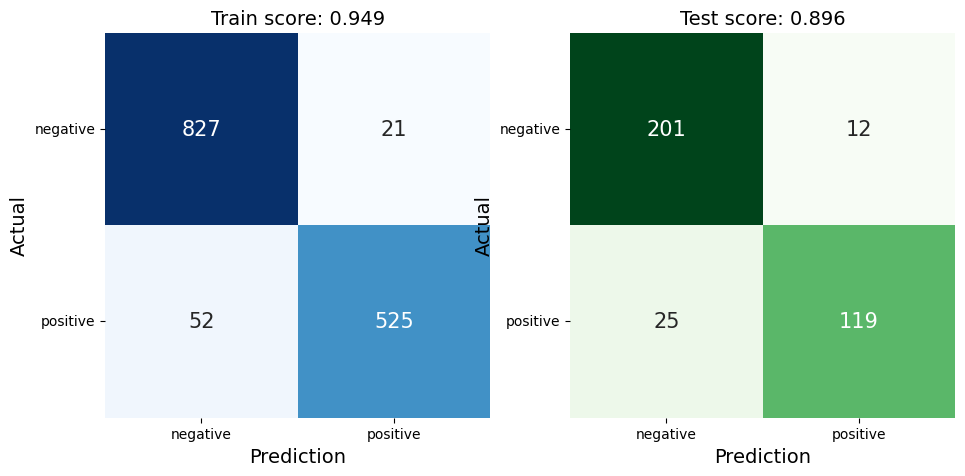

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)